In [1]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

import matplotlib

In [2]:
def convtime(x):
    x=x.removesuffix(':00+00:00')
    x=x.replace('T',' ')
    return x

In [3]:
signals=pd.read_csv('../1-input/5-signals-training.csv', sep=';')
print(signals.shape)
signals1=pd.read_csv('../1-input/5-signals-testing.csv', sep=';')
print(signals1.shape)
signals=signals.append(signals1)
print(signals.shape)
signals['Timestamp']=signals['Timestamp'].apply(convtime)
signals['Timestamp'] = pd.to_datetime(signals['Timestamp'])
signals['working']=signals.Grd_Prod_Pwr_Avg.apply(lambda x: 1 if x>50 else 0)
signals.loc[signals.working==1].shape, signals.shape
signals.reset_index(drop=True, inplace=True)
signals.head()


(434145, 83)
(87639, 83)


C:\Users\David MC\AppData\Local\Temp\ipykernel_7132\3030828519.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  signals=signals.append(signals1)


(521784, 83)


,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,working
0,T11,2016-01-01,1339.4,1233.3,1270.9,18.8,42.0,59,61,60,...,-752.6,-1000.0,56.5,973.4,1000.0,752.6,56.5,38,206.9,1
1,T06,2016-01-01,1270.0,1232.8,1248.5,6.8,42.0,51,52,53,...,0.0,-880.6,180.0,307.1,880.6,0.0,180.0,35,204.6,1
2,T01,2016-01-01,1277.4,1226.1,1249.0,9.0,41.0,58,59,58,...,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37,218.5,0
3,T09,2016-01-01,1376.7,1234.3,1272.0,24.7,40.0,58,57,58,...,-224.5,-1000.0,185.5,861.6,1000.0,224.5,185.5,33,214.0,1
4,T07,2016-01-01,1317.5,1229.5,1254.9,13.8,41.0,62,62,61,...,0.0,-1000.0,338.9,536.5,1000.0,0.0,338.9,39,197.3,1


In [4]:
fails=pd.read_csv('../1-input/3-failures.csv', sep=';')
fails['Timestamp']=fails['Timestamp'].apply(convtime)
fails['Timestamp'] = pd.to_datetime(fails['Timestamp'])

fails


,Turbine_ID,Component,Timestamp,Remarks
0,T01,GEARBOX,2016-07-18 02:10:00,Gearbox pump damaged
1,T06,GENERATOR,2016-07-11 19:48:00,Generator replaced
2,T06,GENERATOR,2016-07-24 17:01:00,Generator temperature sensor failure
3,T06,GENERATOR,2016-09-04 08:08:00,High temperature generator error
4,T06,GENERATOR,2016-10-27 16:26:00,Generator replaced
5,T06,GENERATOR,2016-10-02 17:08:00,Refrigeration system and temperature sensors i...
6,T06,HYDRAULIC_GROUP,2016-04-04 18:53:00,Error in pitch regulation
7,T07,GENERATOR_BEARING,2016-04-30 12:40:00,High temperature in generator bearing (replace...
8,T07,TRANSFORMER,2016-07-10 03:46:00,High temperature transformer
9,T07,TRANSFORMER,2016-08-23 02:21:00,High temperature transformer. Transformer refr...


In [5]:
fgen=fails.loc[fails.Component=='HYDRAULIC_GROUP']

fgen

,Turbine_ID,Component,Timestamp,Remarks
6,T06,HYDRAULIC_GROUP,2016-04-04 18:53:00,Error in pitch regulation
15,T11,HYDRAULIC_GROUP,2016-10-17 17:44:00,Hydraulic group error in the brake circuit
18,T06,HYDRAULIC_GROUP,2017-08-19 09:47:00,Oil leakage in Hub
21,T07,HYDRAULIC_GROUP,2017-06-17 11:35:00,Oil leakage in Hub
22,T07,HYDRAULIC_GROUP,2017-10-19 10:11:00,Oil leakage in Hub
25,T09,HYDRAULIC_GROUP,2017-09-16 15:46:00,Pitch position error related GH
26,T11,HYDRAULIC_GROUP,2017-04-26 18:06:00,Hydraulic group error in the brake circuit
27,T11,HYDRAULIC_GROUP,2017-09-12 15:30:00,Hydraulic group error in the brake circuit


In [6]:
signals=signals.loc[signals.working==1]
signals.reset_index(drop=True, inplace=True)
fgen.reset_index(drop=True, inplace=True)

In [7]:
signals['fase60']=0
signals['vid_util']=60*24*6


for j, moment in enumerate(signals.Timestamp):
    for i, event in enumerate(fgen.Timestamp):
        delta=  event-moment
        sep2=[3]
        sep=str(delta).split(' days')
        sep[0]=float(sep[0])
        sep[1]=sep[1].removeprefix(' +').removesuffix(':00').split(':')
        sep2[0]=sep[0]
        sep2.append(int(sep[1][0]))
        sep2.append(int(sep[1][1]))
        sep=sep2
        if sep[0]<60 and sep[0]>0 and fgen.Turbine_ID[i]==signals.Turbine_ID[j]:
            signals['fase60'][j]=1
            calc=sep[0]*(24*6)+sep[1]*6+sep[2]/10
            signals['vid_util'][j]=calc
        else: 
            continue
            
            


C:\Users\David MC\AppData\Local\Temp\ipykernel_7132\4077355795.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['fase60'][j]=1
C:\Users\David MC\AppData\Local\Temp\ipykernel_7132\4077355795.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['vid_util'][j]=calc


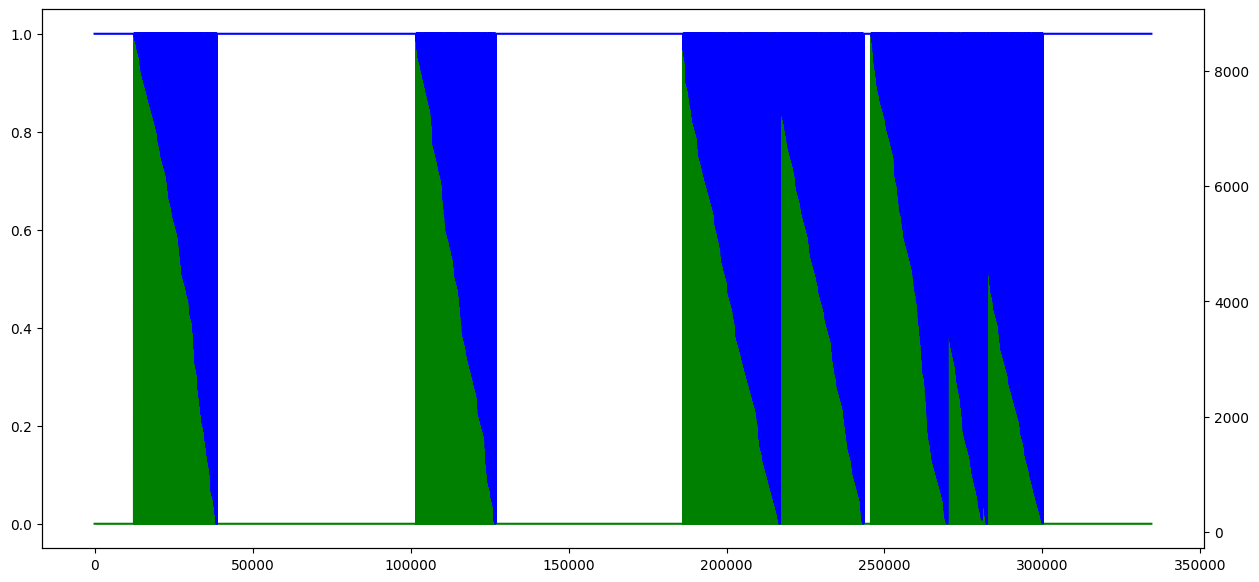

In [8]:
values1=signals['fase60']
values2=signals['vid_util']
fig, ax1 = plt.subplots(figsize=(15,7))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

In [9]:
signals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334467 entries, 0 to 334466
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Turbine_ID                   334467 non-null  object        
 1   Timestamp                    334467 non-null  datetime64[ns]
 2   Gen_RPM_Max                  334467 non-null  float64       
 3   Gen_RPM_Min                  334467 non-null  float64       
 4   Gen_RPM_Avg                  334467 non-null  float64       
 5   Gen_RPM_Std                  334467 non-null  float64       
 6   Gen_Bear_Temp_Avg            334462 non-null  float64       
 7   Gen_Phase1_Temp_Avg          334467 non-null  int64         
 8   Gen_Phase2_Temp_Avg          334467 non-null  int64         
 9   Gen_Phase3_Temp_Avg          334467 non-null  int64         
 10  Hyd_Oil_Temp_Avg             334467 non-null  int64         
 11  Gear_Oil_Temp_Avg         

In [10]:
signals.loc[signals['fase60']==1]

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,working,fase60,vid_util
12465,T06,2016-02-04 19:00:00,1755.2,1622.5,1673.4,20.5,69.0,96,106,111,...,192.3,557.2,1000.0,406.1,181.4,57,117.6,1,1,8639.3
12467,T06,2016-02-04 19:10:00,1737.5,1610.1,1669.2,19.0,68.0,95,105,109,...,191.9,642.4,1000.0,406.1,210.3,57,108.5,1,1,8638.3
12475,T06,2016-02-04 19:20:00,1737.3,1628.3,1676.3,20.0,68.0,95,105,109,...,172.6,500.6,1000.0,406.1,153.4,57,108.5,1,1,8637.3
12478,T06,2016-02-04 19:30:00,1754.9,1638.7,1677.8,16.6,68.0,96,105,110,...,151.7,471.5,997.4,406.1,108.8,57,108.5,1,1,8636.3
12484,T06,2016-02-04 19:40:00,1722.3,1648.8,1681.3,12.9,67.0,96,106,110,...,40.3,410.6,583.5,406.1,21.1,57,100.8,1,1,8635.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300092,T07,2017-10-18 07:50:00,1642.7,1217.9,1393.5,109.9,45.0,70,70,69,...,0.0,1000.0,1000.0,1000.0,0.0,42,268.1,1,1,158.1
300098,T07,2017-10-18 08:00:00,1701.3,1296.9,1607.5,94.7,44.0,71,71,69,...,0.0,992.9,1000.0,665.0,34.5,42,260.0,1,1,157.1
300103,T07,2017-10-18 08:10:00,1722.3,1620.1,1677.1,15.1,45.0,77,77,74,...,140.5,794.2,1000.0,406.1,219.3,42,251.8,1,1,156.1
300106,T07,2017-10-18 08:20:00,1705.1,1281.7,1560.1,116.4,46.0,79,78,76,...,3.5,983.0,1000.0,578.6,57.6,42,274.9,1,1,155.1


In [11]:
listc=signals.columns
listc

Index(['Turbine_ID', 'Timestamp', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg',
       'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg',
       'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg',
       'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Max',
       'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std',
       'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg',
       'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1',
       'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr',
       'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1',
       'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr',
       'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg',
       'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg',
       'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg',
       'Gen_SlipRing_Temp_Avg', 'Spin

In [12]:
'''plt.figure(figsize=(40, 40))

mask=np.triu(np.ones_like(signals.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(signals.corr(),
           #mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});'''

"plt.figure(figsize=(40, 40))\n\nmask=np.triu(np.ones_like(signals.corr(), dtype=bool))\n\ncmap=sns.diverging_palette(0, 10, as_cmap=True)\n\nsns.heatmap(signals.corr(),\n           #mask=mask,\n          cmap=cmap,\n          center=0,\n          square=True,\n          annot=True,\n          linewidths=0.5,\n          cbar_kws={'shrink': 0.5});"

In [13]:
cor_matrix = signals.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop2=['working', 'Prod_LatestAvg_ActPwrGen2','Prod_LatestAvg_ReactPwrGen2']
to_drop+=to_drop2

C:\Users\David MC\AppData\Local\Temp\ipykernel_7132\234955373.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [14]:
signals.drop(to_drop, axis=1, inplace=True)
signals

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fase60,vid_util
0,T11,2016-01-01 00:00:00,1339.4,1233.3,1270.9,18.8,42.0,59,30,48,...,-973.4,-752.6,-1000.0,56.5,973.4,1000.0,38,206.9,0,8640.0
1,T06,2016-01-01 00:00:00,1270.0,1232.8,1248.5,6.8,42.0,51,30,43,...,-307.1,0.0,-880.6,180.0,307.1,880.6,35,204.6,0,8640.0
2,T09,2016-01-01 00:00:00,1376.7,1234.3,1272.0,24.7,40.0,58,44,43,...,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,33,214.0,0,8640.0
3,T07,2016-01-01 00:00:00,1317.5,1229.5,1254.9,13.8,41.0,62,32,45,...,-536.5,0.0,-1000.0,338.9,536.5,1000.0,39,197.3,0,8640.0
4,T09,2016-01-01 00:10:00,1485.0,1239.7,1321.4,50.4,40.0,58,44,43,...,-871.4,-293.3,-1000.0,227.4,871.4,1000.0,33,214.0,0,8640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334462,T11,2017-12-31 23:50:00,1320.5,1216.8,1262.0,20.6,42.0,56,28,50,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,37,331.5,0,8640.0
334463,T07,2017-12-31 23:50:00,1329.9,1193.0,1257.6,18.9,38.0,61,30,49,...,-966.0,-256.3,-1000.0,109.8,966.0,1000.0,32,334.8,0,8640.0
334464,T01,2017-12-31 23:50:00,1273.1,1239.8,1250.7,4.7,39.0,59,26,49,...,-983.9,-727.0,-1000.0,50.2,983.9,1000.0,38,347.8,0,8640.0
334465,T09,2017-12-31 23:50:00,1258.3,1239.7,1249.5,3.1,39.0,60,45,46,...,-955.8,-372.9,-1000.0,119.2,955.8,1000.0,32,339.7,0,8640.0


In [15]:
def turbine_name(x):
    equis=int(x.removeprefix('T'))       
    return equis

In [16]:
signals.Turbine_ID=signals.Turbine_ID.apply(lambda x: turbine_name(x))
signals=signals.dropna().reset_index(drop=True)

In [17]:
import random

list_ceros= signals.loc[(signals.fase60==0)].index
list_unos= signals.loc[(signals.fase60==1)].index
list_ceros_equal=random.choices(list(list_ceros), k=len(list_unos)*4)
list_analysis= list_ceros_equal + list(list_unos)
list_analysis.sort()
signals2=signals.iloc[list_analysis]
len(list_ceros_equal), len(list_ceros), len(list_unos), len(list_analysis)

(172804, 291261, 43201, 216005)

In [18]:
signals.iloc[list_unos].fase60

12465     1
12467     1
12475     1
12478     1
12484     1
         ..
300087    1
300093    1
300098    1
300101    1
300109    1
Name: fase60, Length: 43201, dtype: int64

In [19]:
signals2.head(10)

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fase60,vid_util
1,6,2016-01-01 00:00:00,1270.0,1232.8,1248.5,6.8,42.0,51,30,43,...,-307.1,0.0,-880.6,180.0,307.1,880.6,35,204.6,0,8640.0
8,9,2016-01-01 00:20:00,1441.0,1274.6,1363.4,31.0,40.0,58,44,44,...,-999.7,-904.9,-1000.0,4.2,999.7,1000.0,33,214.0,0,8640.0
11,1,2016-01-01 00:30:00,1306.6,1212.4,1257.1,17.0,40.0,56,30,44,...,-654.0,0.0,-1000.0,245.8,654.0,1000.0,36,222.4,0,8640.0
13,11,2016-01-01 00:30:00,1470.1,1258.7,1377.5,48.9,43.0,60,30,49,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,38,206.9,0,8640.0
14,9,2016-01-01 00:30:00,1549.4,1266.5,1379.7,76.8,41.0,59,44,44,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,33,214.0,0,8640.0
16,7,2016-01-01 00:40:00,1366.1,1236.5,1288.2,32.8,42.0,63,32,46,...,-997.1,-908.9,-1000.0,13.6,997.1,1000.0,40,203.9,0,8640.0
17,1,2016-01-01 00:40:00,1320.9,1224.1,1257.7,18.0,40.0,57,30,44,...,-496.1,0.0,-1000.0,302.7,496.1,1000.0,36,222.4,0,8640.0
20,6,2016-01-01 00:40:00,1302.7,1225.1,1257.6,13.4,41.0,50,31,43,...,-872.3,-556.0,-1000.0,150.9,872.3,1000.0,35,207.4,0,8640.0
21,11,2016-01-01 00:50:00,1492.1,1258.0,1363.7,51.5,44.0,61,30,50,...,-996.3,-564.8,-1000.0,29.5,996.3,1000.0,39,206.9,0,8640.0
21,11,2016-01-01 00:50:00,1492.1,1258.0,1363.7,51.5,44.0,61,30,50,...,-996.3,-564.8,-1000.0,29.5,996.3,1000.0,39,206.9,0,8640.0


In [20]:
signals2.fase60.value_counts()

0    172804
1     43201
Name: fase60, dtype: int64

In [21]:
X=signals.drop(['fase60','vid_util','Timestamp','Turbine_ID', 'Grd_Prod_Freq_Avg', 'Grd_Prod_PsbleInd_Min', 'Grd_Prod_PsbleInd_Max', 'Grd_Prod_CosPhi_Avg', 'Prod_LatestAvg_ReactPwrGen0', 'Grd_Prod_PsbleInd_Std', 'Blds_PitchAngle_Max', 'Prod_LatestAvg_ActPwrGen0', 'Grd_Prod_ReactPwr_Max', 'Grd_Prod_ReactPwr_Std', 'Grd_Prod_PsbleCap_Max', 'Prod_LatestAvg_ReactPwrGen1', 'Grd_Prod_VoltPhse3_Avg', 'Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_Pwr_Std'], axis=1)[:275365]

y=signals.fase60[:275365]

X.shape, y.shape

((275365, 38), (275365,))

In [22]:
Xbus=signals.drop(['fase60','vid_util','Timestamp','Turbine_ID', 'Grd_Prod_Freq_Avg', 'Grd_Prod_PsbleInd_Min', 'Grd_Prod_PsbleInd_Max', 'Grd_Prod_CosPhi_Avg', 'Prod_LatestAvg_ReactPwrGen0', 'Grd_Prod_PsbleInd_Std', 'Blds_PitchAngle_Max', 'Prod_LatestAvg_ActPwrGen0', 'Grd_Prod_ReactPwr_Max', 'Grd_Prod_ReactPwr_Std', 'Grd_Prod_PsbleCap_Max', 'Prod_LatestAvg_ReactPwrGen1', 'Grd_Prod_VoltPhse3_Avg', 'Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_Pwr_Std'], axis=1)[275365:]
ybus=signals.fase60[275365:]

Xbus.shape, ybus.shape

((59097, 38), (59097,))

In [23]:
from sklearn.model_selection import train_test_split as tts

from sklearn.svm import SVR 
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGBC

from sklearn.metrics import balanced_accuracy_score as balacc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as rec
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acc

logreg=LogReg (max_iter=500)
rfc=RFC(n_estimators=500)
xgbc=XGBC()
svr=SVR()

from sklearn.preprocessing import RobustScaler


In [39]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.01, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((272611, 38), (2754, 38), (272611,), (2754,))

In [40]:
modelos=[logreg, rfc, xgbc]

modelos_name=[ 'LogReg', 'RFC','xgbc']

balacc_score=[]
prec_score=[]
rec_score=[]
f1_score=[]
acc_score=[]

for i,m in enumerate(modelos):

    m.fit(X_train, y_train)
    
    y_pred=m.predict(X_test)
    
    acc_score.append(acc(y_test, y_pred))
    prec_score.append(prec(y_test, y_pred))
    rec_score.append(rec(y_test, y_pred))
    f1_score.append(f1(y_test, y_pred))
    
    print(modelos_name[i])

analisis= pd.DataFrame({"modelos" : modelos_name, "acc_score" : acc_score, "prec_score" : prec_score, "rec_score" : rec_score, "f1_score" : f1_score})

analisis


c:\Users\David MC\.conda\envs\Ironhack\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogReg
RFC
xgbc


,modelos,acc_score,prec_score,rec_score,f1_score
0,LogReg,0.869644,0.000000,0.000000,0.000000
1,RFC,0.953885,0.987179,0.650704,0.784380
2,xgbc,0.927378,0.847534,0.532394,0.653979


In [44]:
y_res=rfc.predict(Xbus)

modelos_name.append('resultado rfc')
acc_score.append(acc(ybus, y_res))
prec_score.append(prec(ybus, y_res))
rec_score.append(rec(ybus, y_res))
f1_score.append(f1(ybus, y_res))

analisis= pd.DataFrame({"modelos" : modelos_name, "acc_score" : acc_score, "prec_score" : prec_score, "rec_score" : rec_score, "f1_score" : f1_score})
analisis

,modelos,acc_score,prec_score,rec_score,f1_score
0,LogReg,0.869644,0.000000,0.000000,0.000000
1,RFC,0.953885,0.987179,0.650704,0.784380
2,xgbc,0.927378,0.847534,0.532394,0.653979
3,resultado rfc,0.865526,0.420373,0.156204,0.227772
4,resultado xgbc,0.846320,0.339630,0.222844,0.269113
5,resultado rfc,0.865526,0.420373,0.156204,0.227772


In [45]:
sigres=signals[275365:]

sigres['calculado']=y_res

sigresT6=sigres.loc[(sigres.Turbine_ID==6)]
sigresT9=sigres.loc[(sigres.Turbine_ID==9)]
sigresT11=sigres.loc[(sigres.Turbine_ID==11)]
sigresT1=sigres.loc[(sigres.Turbine_ID==1)]
sigresT7=sigres.loc[(sigres.Turbine_ID==7)]

C:\Users\David MC\AppData\Local\Temp\ipykernel_7132\519670577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigres['calculado']=y_res


C:\Users\David MC\AppData\Local\Temp\ipykernel_7132\1245427771.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT6['dano_acum']=signal


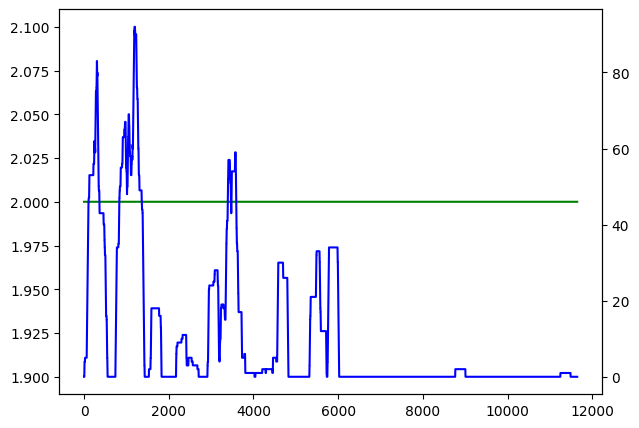

In [47]:
fase60=list(sigresT6['fase60'])
predic=list(sigresT6['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)
    
fase60_2=[item+2 for item in fase60]

sigresT6['dano_acum']=signal

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

In [81]:
danoT6= sigresT6.loc[(sigresT6['dano_acum']>60)& (sigresT6['dano_acum']<70)].reset_index(drop=True)

danoT6.Timestamp.unique()

array(['2017-09-02T23:30:00.000000000', '2017-09-02T23:40:00.000000000',
       '2017-09-02T23:50:00.000000000', '2017-09-03T00:00:00.000000000',
       '2017-09-03T02:50:00.000000000', '2017-09-03T03:00:00.000000000',
       '2017-09-03T03:10:00.000000000', '2017-09-03T03:20:00.000000000',
       '2017-09-03T03:30:00.000000000', '2017-09-03T03:40:00.000000000',
       '2017-09-03T03:50:00.000000000', '2017-09-03T04:00:00.000000000',
       '2017-09-03T04:10:00.000000000', '2017-09-03T12:50:00.000000000',
       '2017-09-03T13:00:00.000000000', '2017-09-03T13:10:00.000000000',
       '2017-09-03T13:20:00.000000000', '2017-09-03T13:30:00.000000000',
       '2017-09-03T13:40:00.000000000', '2017-09-03T13:50:00.000000000',
       '2017-09-03T14:00:00.000000000', '2017-09-03T14:10:00.000000000',
       '2017-09-09T12:20:00.000000000', '2017-09-09T12:30:00.000000000',
       '2017-09-09T12:40:00.000000000', '2017-09-09T12:50:00.000000000',
       '2017-09-09T13:00:00.000000000', '2017-09-09

C:\Users\David MC\AppData\Local\Temp\ipykernel_7132\2280315876.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT9['dano_acum']=signal


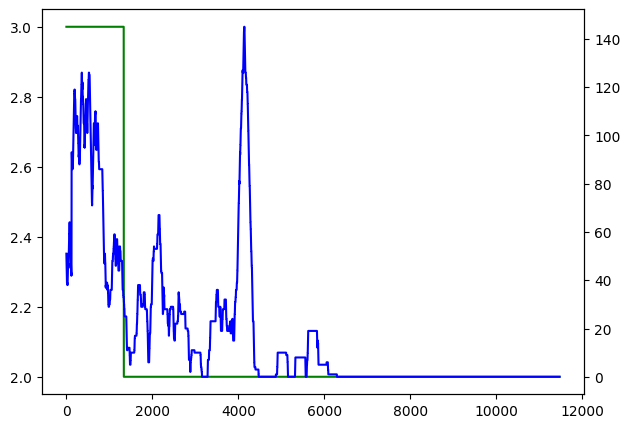

In [48]:
fase60=list(sigresT9['fase60'])
predic=list(sigresT9['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

sigresT9['dano_acum']=signal

In [82]:
danoT9= sigresT9.loc[(sigresT9['dano_acum']>60)& (sigresT9['dano_acum']<70)].reset_index(drop=True)


In [59]:
fgen.Timestamp.loc[fgen.Turbine_ID==9]

10   2016-10-11 08:06:00
23   2017-10-18 08:32:00
Name: Timestamp, dtype: datetime64[ns]

In [60]:
danoT9= sigresT9.loc[sigresT9['dano_acum']>100].reset_index(drop=True)
delta=danoT9.Timestamp[0]-fgen.Timestamp.loc[fgen.Turbine_ID==9]
delta2=fgen.Timestamp.loc[fgen.Turbine_ID==9]- danoT9.Timestamp[0]

delta, delta2

(10    325 days 19:54:00
 23   -47 days +19:28:00
 Name: Timestamp, dtype: timedelta64[ns],
 10   -326 days +04:06:00
 23      46 days 04:32:00
 Name: Timestamp, dtype: timedelta64[ns])

C:\Users\David MC\AppData\Local\Temp\ipykernel_7132\4009087320.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT11['dano_acum']=signal


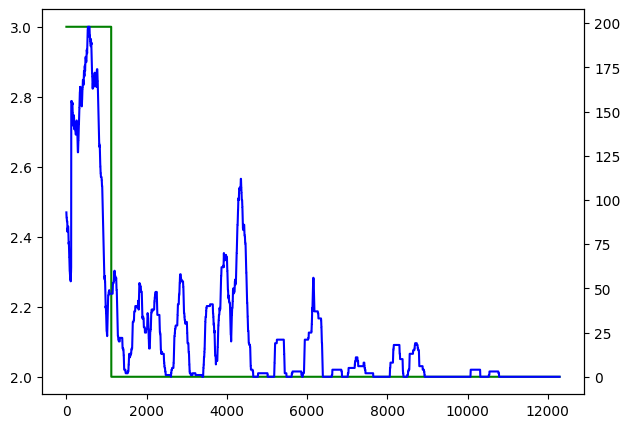

In [49]:
fase60=list(sigresT11['fase60'])
predic=list(sigresT11['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

sigresT11['dano_acum']=signal

In [68]:
danoT11= sigresT11.loc[sigresT11['dano_acum']>75].reset_index(drop=True)

danoT11

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fase60,vid_util,calculado,dano_acum
0,11,2017-09-01 00:00:00,1266.3,1234.3,1250.6,5.1,46.0,60,39,51,...,-1000.0,109.1,864.5,1000.0,43,96.8,1,1677.0,1,93
1,11,2017-09-01 00:10:00,1318.3,1241.5,1254.7,11.0,46.0,61,39,51,...,-1000.0,36.3,991.9,1000.0,44,103.1,1,1676.0,1,92
2,11,2017-09-01 00:20:00,1288.9,1236.0,1252.2,7.6,47.0,62,39,51,...,-1000.0,60.8,964.1,1000.0,44,109.9,1,1675.0,1,91
3,11,2017-09-01 00:30:00,1261.9,1232.0,1249.7,4.6,47.0,62,39,51,...,-1000.0,203.4,615.1,1000.0,44,111.9,1,1674.0,1,91
4,11,2017-09-01 00:40:00,1269.2,1240.3,1251.4,4.2,48.0,63,39,51,...,-1000.0,183.2,793.1,1000.0,44,118.5,1,1673.0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,11,2017-10-14 21:10:00,1573.7,1219.0,1369.5,113.5,59.0,70,38,54,...,-1000.0,129.3,938.4,1000.0,51,96.2,0,8640.0,0,76
1073,11,2017-10-14 21:20:00,1498.0,69.5,1175.2,336.9,57.0,70,38,55,...,-1000.0,471.8,544.4,1000.0,51,107.1,0,8640.0,0,76
1074,11,2017-10-14 21:40:00,1268.7,1232.5,1251.0,7.0,54.0,64,38,53,...,-1000.0,188.4,775.9,1000.0,48,88.8,0,8640.0,0,76
1075,11,2017-10-14 21:50:00,1448.8,1240.4,1280.2,47.1,51.0,64,38,53,...,-1000.0,0.0,1000.0,1000.0,48,93.0,0,8640.0,0,76


In [66]:
fgen.Timestamp.loc[fgen.Turbine_ID==11]

Series([], Name: Timestamp, dtype: datetime64[ns])

In [63]:
danoT11= sigresT11.loc[sigresT11['dano_acum']>100].reset_index(drop=True)
delta=danoT11.Timestamp[0]-fgen.Timestamp.loc[fgen.Turbine_ID==11]
delta2=fgen.Timestamp.loc[fgen.Turbine_ID==11]- danoT11.Timestamp[0]

delta, delta2

(Series([], Name: Timestamp, dtype: timedelta64[ns]),
 Series([], Name: Timestamp, dtype: timedelta64[ns]))

C:\Users\David MC\AppData\Local\Temp\ipykernel_7132\1960030041.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT1['dano_acum']=signal


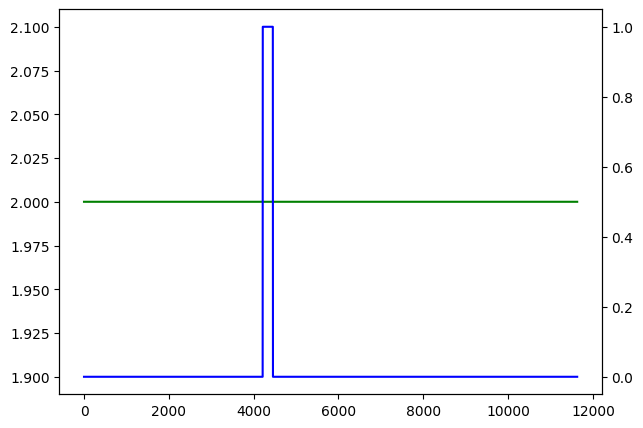

In [50]:
fase60=list(sigresT1['fase60'])
predic=list(sigresT1['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

sigresT1['dano_acum']=signal

C:\Users\David MC\AppData\Local\Temp\ipykernel_7132\346489614.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT7['dano_acum']=signal


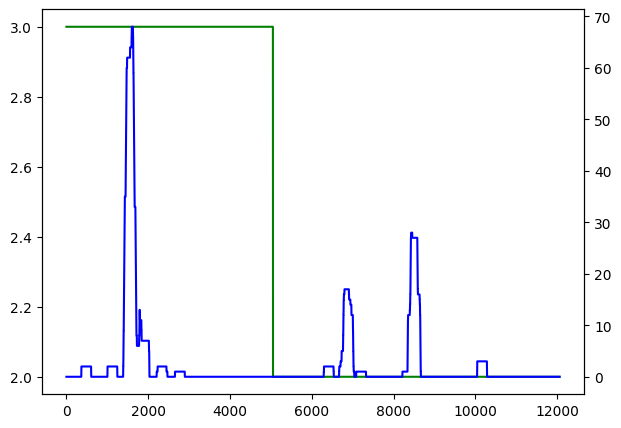

In [51]:
fase60=list(sigresT7['fase60'])
predic=list(sigresT7['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

sigresT7['dano_acum']=signal

In [71]:
danoT7= sigresT7.loc[sigresT7['dano_acum']>60].reset_index(drop=True)

danoT7

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fase60,vid_util,calculado,dano_acum
0,7,2017-09-16 00:10:00,1670.6,1241.4,1485.2,110.0,44.0,65,34,50,...,-1000.0,0.0,1000.0,1000.0,40,234.1,1,4812.1,0,61
1,7,2017-09-16 00:20:00,1667.5,1240.6,1418.8,105.7,44.0,65,34,50,...,-1000.0,0.0,1000.0,1000.0,40,237.1,1,4811.1,0,62
2,7,2017-09-16 00:30:00,1530.6,1223.3,1289.5,56.1,44.0,65,34,50,...,-1000.0,10.7,998.9,1000.0,40,240.4,1,4810.1,0,62
3,7,2017-09-16 00:40:00,1510.8,1220.1,1287.7,60.6,44.0,64,34,50,...,-1000.0,41.4,988.6,1000.0,40,240.4,1,4809.1,0,62
4,7,2017-09-16 00:50:00,1623.3,1196.8,1310.5,89.0,44.0,64,34,49,...,-1000.0,154.1,946.7,1000.0,40,244.1,1,4808.1,0,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,7,2017-09-18 15:50:00,1694.6,1327.9,1579.6,110.9,47.0,70,34,53,...,-1000.0,7.4,999.5,1000.0,43,283.6,1,4430.1,0,65
152,7,2017-09-18 16:00:00,1689.5,1270.5,1551.9,119.2,47.0,70,34,54,...,-1000.0,0.0,1000.0,1000.0,43,281.4,1,4429.1,0,64
153,7,2017-09-18 16:10:00,1688.6,1262.9,1587.0,108.1,47.0,71,34,54,...,-1000.0,0.0,1000.0,1000.0,43,278.8,1,4428.1,0,63
154,7,2017-09-18 16:20:00,1692.9,1276.2,1563.2,125.0,47.0,72,34,55,...,-1000.0,0.0,1000.0,1000.0,43,275.0,1,4427.1,0,62


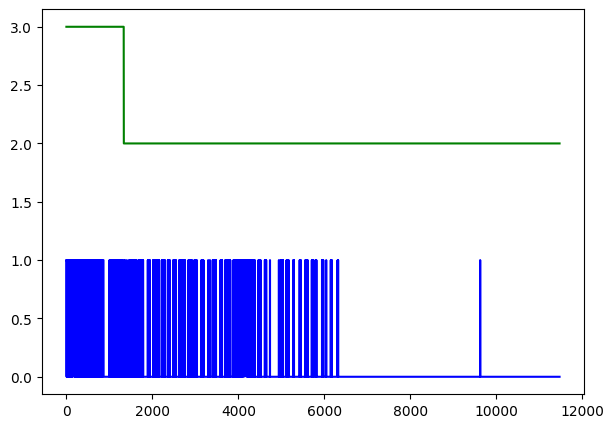

In [33]:
fase60=list(sigresT9['fase60'])
predic=list(sigresT9['calculado'])

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=predic
fig, ax1 = plt.subplots(figsize=(7,5))

#ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax1.plot(values2, 'b-')

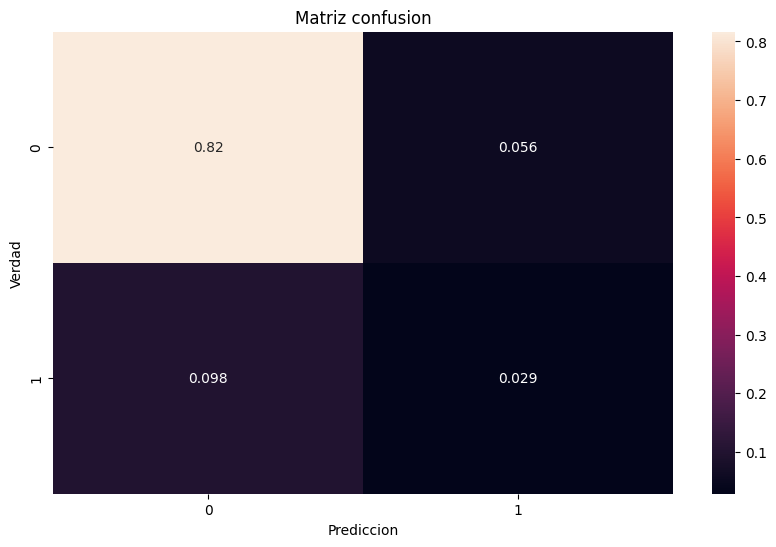

In [34]:
plt.figure(figsize=(10, 6))

ax=sns.heatmap(cm(ybus, y_res)/sum(sum(cm(ybus, y_res))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [35]:
erre=dict(zip(X.columns, xgbc.feature_importances_))

{k: v for k, v in sorted(erre.items(), key=lambda item: item[1])}

{'Blds_PitchAngle_Std': 0.0061316807,
 'Amb_WindDir_Relative_Avg': 0.006335442,
 'Blds_PitchAngle_Avg': 0.007147956,
 'Blds_PitchAngle_Min': 0.008546817,
 'Grd_Prod_PsbleInd_Avg': 0.009117917,
 'Amb_WindSpeed_Max': 0.009748088,
 'Grd_Prod_PsbleCap_Avg': 0.010068467,
 'Amb_WindSpeed_Min': 0.010399438,
 'Gen_RPM_Std': 0.011749895,
 'Grd_Prod_Pwr_Max': 0.013457976,
 'Gen_RPM_Avg': 0.01395829,
 'Gen_RPM_Max': 0.014080878,
 'Grd_Prod_Pwr_Min': 0.014309916,
 'Gen_RPM_Min': 0.01439168,
 'Amb_WindSpeed_Avg': 0.014527599,
 'Grd_Prod_ReactPwr_Min': 0.017148089,
 'Grd_Prod_VoltPhse2_Avg': 0.018694842,
 'Amb_WindDir_Abs_Avg': 0.018974299,
 'Grd_Busbar_Temp_Avg': 0.02333843,
 'Gear_Oil_Temp_Avg': 0.02381881,
 'Amb_WindSpeed_Std': 0.029345151,
 'Gen_Bear2_Temp_Avg': 0.031938206,
 'Cont_Top_Temp_Avg': 0.03315669,
 'Cont_VCP_Temp_Avg': 0.033333674,
 'Gen_Bear_Temp_Avg': 0.034037173,
 'Gen_Phase1_Temp_Avg': 0.035762217,
 'Nac_Direction_Avg': 0.036521446,
 'Cont_Hub_Temp_Avg': 0.037351754,
 'Hyd_Oil_Tem

In [69]:
fgen=fails.loc[fails.Component=='HYDRAULIC_GROUP']
fgen.Turbine_ID=fgen.Turbine_ID.apply(lambda x: turbine_name(x))
fgen

C:\Users\David MC\AppData\Local\Temp\ipykernel_7132\3061570592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fgen.Turbine_ID=fgen.Turbine_ID.apply(lambda x: turbine_name(x))


,Turbine_ID,Component,Timestamp,Remarks
6,6,HYDRAULIC_GROUP,2016-04-04 18:53:00,Error in pitch regulation
15,11,HYDRAULIC_GROUP,2016-10-17 17:44:00,Hydraulic group error in the brake circuit
18,6,HYDRAULIC_GROUP,2017-08-19 09:47:00,Oil leakage in Hub
21,7,HYDRAULIC_GROUP,2017-06-17 11:35:00,Oil leakage in Hub
22,7,HYDRAULIC_GROUP,2017-10-19 10:11:00,Oil leakage in Hub
25,9,HYDRAULIC_GROUP,2017-09-16 15:46:00,Pitch position error related GH
26,11,HYDRAULIC_GROUP,2017-04-26 18:06:00,Hydraulic group error in the brake circuit
27,11,HYDRAULIC_GROUP,2017-09-12 15:30:00,Hydraulic group error in the brake circuit


In [37]:
danoT6= sigresT6.loc[sigresT6['dano_acum']>60].reset_index(drop=True)
delta=danoT6.Timestamp[0]-fgen.Timestamp.loc[fgen.Turbine_ID==6]
delta2=fgen.Timestamp.loc[fgen.Turbine_ID==6]- danoT6.Timestamp[0]

delta, delta2

(17   -46 days +20:42:00
 Name: Timestamp, dtype: timedelta64[ns],
 17   45 days 03:18:00
 Name: Timestamp, dtype: timedelta64[ns])